<a href="https://colab.research.google.com/github/Bhanukoya/Decision-Tree-Applications/blob/master/Decision_Tree_play_tennis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Decision tree algorithm to a dataset whose prediction is to play tennis or not based on weather realted features

In [3]:
% matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas

In [4]:
dataset = pandas.read_csv("play_tennis.csv")

In [5]:
dataset

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [6]:
categorical_cols = ['outlook','temp','humidity','wind']
for column in categorical_cols:
    dataset[column] = pandas.factorize(dataset[column])[0]
dataset

,day,outlook,temp,humidity,wind,play
0,D1,0,0,0,0,No
1,D2,0,0,0,1,No
2,D3,1,0,0,0,Yes
3,D4,2,1,0,0,Yes
4,D5,2,2,1,0,Yes
5,D6,2,2,1,1,No
6,D7,1,2,1,1,Yes
7,D8,0,1,0,0,No
8,D9,0,2,1,0,Yes
9,D10,2,1,1,0,Yes


In [7]:
dataset['play'] = dataset['play'].replace('Yes', 1)
dataset['play'] = dataset['play'].replace('No', 0)
dataset

,day,outlook,temp,humidity,wind,play
0,D1,0,0,0,0,0
1,D2,0,0,0,1,0
2,D3,1,0,0,0,1
3,D4,2,1,0,0,1
4,D5,2,2,1,0,1
5,D6,2,2,1,1,0
6,D7,1,2,1,1,1
7,D8,0,1,0,0,0
8,D9,0,2,1,0,1
9,D10,2,1,1,0,1


In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size = 0.3, random_state=50)

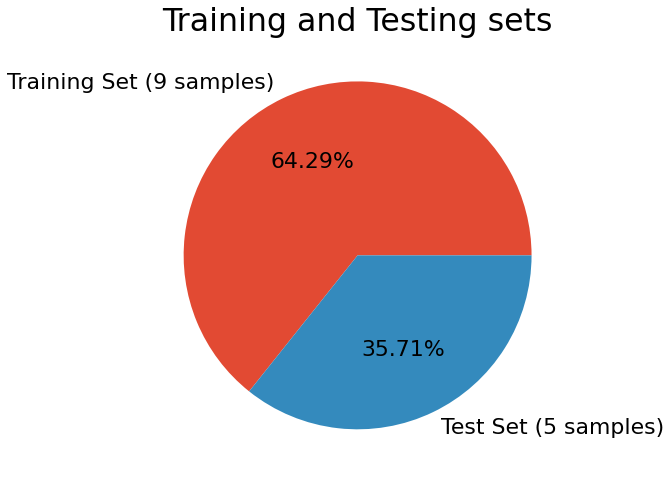

In [9]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
labels = ["Training Set (%d samples)" % len(train), "Test Set (%d samples)" % len(test)]
sizes = [len(train), len(test)]
plt.rcParams.update({'font.size': 22})
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Training and Testing sets")
ax.set_aspect('equal')

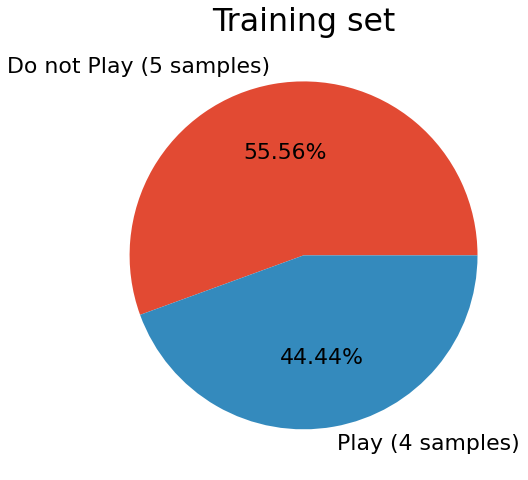

In [10]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()
labels = ["Do not Play (%d samples)" % len(train[train.play == 0]), "Play (%d samples)" % len(train[train.play > 0])]
sizes = [len(train[train.play == 0]), len(train[train.play > 0])]
ax.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Training set")
plt.rcParams.update({'font.size': 22})
ax.set_aspect('equal')

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [13]:
decision_tree_binary_classifier = dt.fit(train[categorical_cols], train.play)

In [14]:
dt.score(test[categorical_cols],test.play)

0.8

In [15]:
dt.predict(test[categorical_cols])

array([1, 1, 1, 0, 1])

In [16]:
train[categorical_cols]

,outlook,temp,humidity,wind
7,0,1,0,0
8,0,2,1,0
5,2,2,1,1
6,1,2,1,1
4,2,2,1,0
1,0,0,0,1
11,1,1,0,1
13,2,1,0,1
0,0,0,0,0


# Examining how the decision tree is formed based on the given classifier parameters

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


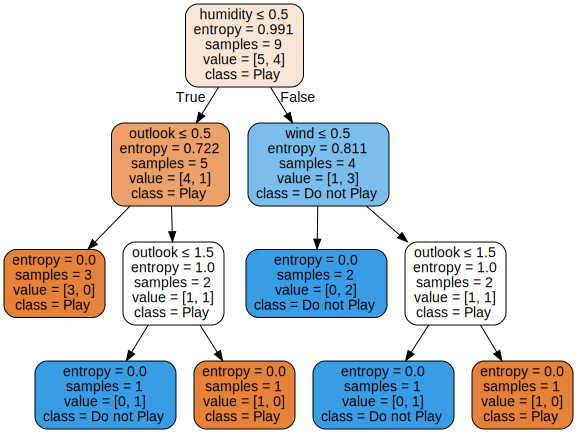

In [17]:
from IPython.display import SVG
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    decision_tree_binary_classifier,
    out_file=dot_data,  
    feature_names=np.array(categorical_cols),
    class_names=['Play', 'Do not Play'],  
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg'))

# Using gini impurity as criterion to check if the perfromance of algorithm varies

In [21]:
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
decision_tree_binary_classifier = dt.fit(train[categorical_cols], train.play)

print(dt.score(test[categorical_cols],test.play))

dt.predict(test[categorical_cols])

0.8


array([1, 1, 1, 0, 1])

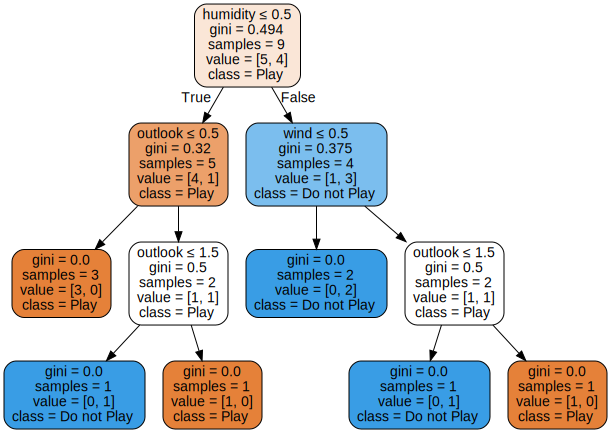

In [20]:
from IPython.display import SVG
import numpy as np
import pydotplus
from sklearn.externals.six import StringIO
dot_data = StringIO()
export_graphviz(
    decision_tree_binary_classifier,
    out_file=dot_data,  
    feature_names=np.array(categorical_cols),
    class_names=['Play', 'Do not Play'],  
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
SVG(graph.create(format='svg'))